

Problem Statement:
>How do annual members and casual riders use Cyclistic bikes differently?




In [43]:
import pandas as pd
import numpy as np
import datetime

In [19]:
q1_2019 = pd.read_csv('/content/Divvy_Trips_2019_Q1.csv')
q1_2020 = pd.read_csv('/content/Divvy_Trips_2020_Q1.csv')


In [20]:
# changing the column names to match that of 2020 Qurter 1
q1_2019 = q1_2019.rename(columns={
    "trip_id": "ride_id",
    "bikeid": "rideable_type",
    "start_time": "started_at",
    "end_time": "ended_at",
    "from_station_name": "start_station_name",
    "from_station_id": "start_station_id",
    "to_station_name": "end_station_name",
    "to_station_id": "end_station_id",
    "usertype": "member_casual"
})

In [21]:
#ride_id, rideable_type to character
q1_2019['ride_id'] = q1_2019['ride_id'].astype(str)
q1_2019['rideable_type'] = q1_2019['rideable_type'].astype(str)



In [22]:
# making a single dataframe
all_trips = pd.concat([q1_2019, q1_2020],ignore_index=True)

In [24]:
#removing unnecessary columns
all_trips = all_trips.drop(columns = ["start_lat", "start_lng", "end_lat", "end_lng", "birthyear", "gender", "tripduration"])

In [26]:
#consolidating the data
all_trips['member_casual'].replace({"Subscriber": "member", "Customer": "casual"}, inplace=True)

In [28]:
# creating date-related column
all_trips["date"] = pd.to_datetime(all_trips["started_at"]).dt.date
all_trips["month"] = pd.to_datetime(all_trips["date"]).dt.month
all_trips["day"] = pd.to_datetime(all_trips["date"]).dt.day
all_trips["year"] = pd.to_datetime(all_trips["date"]).dt.year
all_trips["day_of_week"] = pd.to_datetime(all_trips["date"]).dt.day_name()


In [29]:
all_trips

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791951,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675.0,HQ QR,casual,2020-03-10,3,10,2020,Tuesday
791952,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,2020-03-07,3,7,2020,Saturday
791953,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,2020-03-01,3,1,2020,Sunday
791954,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,2020-03-07,3,7,2020,Saturday


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
all_trips['start_station_id'].plot(kind='hist', bins=20, title='start_station_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips['end_station_id'].plot(kind='hist', bins=20, title='end_station_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
all_trips.groupby('member_casual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
all_trips.groupby('day_of_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips.plot(kind='scatter', x='start_station_id', y='end_station_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips.plot(kind='scatter', x='end_station_id', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips.plot(kind='scatter', x='month', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_trips.plot(kind='scatter', x='day', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['start_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_trips.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('member_casual')):
  _plot_series(series, series_name, i)
  fig.legend(title='member_casual', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('start_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['start_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_trips.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day_of_week')):
  _plot_series(series, series_name, i)
  fig.legend(title='day_of_week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('start_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['end_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_trips.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('member_casual')):
  _plot_series(series, series_name, i)
  fig.legend(title='member_casual', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('end_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['end_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_trips.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day_of_week')):
  _plot_series(series, series_name, i)
  fig.legend(title='day_of_week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('end_station_id')

from matplotlib import pyplot as plt
all_trips['start_station_id'].plot(kind='line', figsize=(8, 4), title='start_station_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_trips['end_station_id'].plot(kind='line', figsize=(8, 4), title='end_station_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_trips['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_trips['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['day_of_week'].value_counts()
    for x_label, grp in all_trips.groupby('member_casual')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('member_casual')
_ = plt.ylabel('day_of_week')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_trips['member_casual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_trips, x='start_station_id', y='member_casual', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_trips['day_of_week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_trips, x='start_station_id', y='day_of_week', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_trips['member_casual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_trips, x='end_station_id', y='member_casual', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_trips['day_of_week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_trips, x='end_station_id', y='day_of_week', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['start_station_id'].plot(kind='hist', bins=20, title='start_station_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['end_station_id'].plot(kind='hist', bins=20, title='end_station_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('member_casual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('day_of_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='start_station_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='start_station_id', y='end_station_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='end_station_id', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='day', y='ride_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['start_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('member_casual')):
  _plot_series(series, series_name, i)
  fig.legend(title='member_casual', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('start_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['start_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('start_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['start_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day_of_week')):
  _plot_series(series, series_name, i)
  fig.legend(title='day_of_week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('start_station_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['started_at']
  ys = series['end_station_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('started_at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('member_casual')):
  _plot_series(series, series_name, i)
  fig.legend(title='member_casual', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('started_at')
_ = plt.ylabel('end_station_id')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['start_station_id'].plot(kind='line', figsize=(8, 4), title='start_station_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['end_station_id'].plot(kind='line', figsize=(8, 4), title='end_station_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['date'].value_counts()
    for x_label, grp in _df_19.groupby('member_casual')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('member_casual')
_ = plt.ylabel('date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['day_of_week'].value_counts()
    for x_label, grp in _df_20.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('day_of_week')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['member_casual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='member_casual', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['day_of_week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='day_of_week', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['member_casual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='start_station_id', y='member_casual', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
# calculating ride_length in seconds
all_trips["started_at"] = pd.to_datetime(all_trips["started_at"])
all_trips["ended_at"] = pd.to_datetime(all_trips["ended_at"])
all_trips["ride_length"] = (all_trips["ended_at"] - all_trips["started_at"]).dt.total_seconds()

In [50]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,390.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday,441.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday,829.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday,1783.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,364.0


In [52]:
# removing bad data
all_trips_v2 = all_trips[(all_trips["start_station_name"] != "HQ QR") & (all_trips["ride_length"] >= 0)].copy()

In [58]:
# Descriptive analysis on ride_length
print("Mean of ride_length in seconds : ", all_trips_v2['ride_length'].mean(),"seconds")
print("Median of ride_length in seconds : ", all_trips_v2['ride_length'].median(),"seconds")
print("Max of ride_length in seconds : ", all_trips_v2['ride_length'].max(),"seconds")
print("Min of ride_length in seconds : ", all_trips_v2['ride_length'].min(),"seconds")


Mean of ride_length in seconds :  1189.4586882080314 seconds
Median of ride_length in seconds :  539.0 seconds
Max of ride_length in seconds :  10632022.0 seconds
Min of ride_length in seconds :  1.0 seconds


In [63]:
# comparing caual and member
print("Mean : ",all_trips_v2.groupby('member_casual')['ride_length'].mean())
print("Median : ",all_trips_v2.groupby('member_casual')['ride_length'].median())
print("Max : ",all_trips_v2.groupby('member_casual')['ride_length'].max())
print("Min : ",all_trips_v2.groupby('member_casual')['ride_length'].min())


Mean :  member_casual
casual    5372.783874
member     795.252339
Name: ride_length, dtype: float64
Median :  member_casual
casual    1393.0
member     508.0
Name: ride_length, dtype: float64
Max :  member_casual
casual    10632022.0
member     6096428.0
Name: ride_length, dtype: float64
Min :  member_casual
casual    2.0
member    1.0
Name: ride_length, dtype: float64


In [66]:
# Aggregate data for visualization
counts = all_trips_v2.groupby(["member_casual", "day_of_week"]).agg(
    number_of_rides=pd.NamedAgg(column='ride_id', aggfunc='count'),
    average_duration=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

In [70]:
# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt


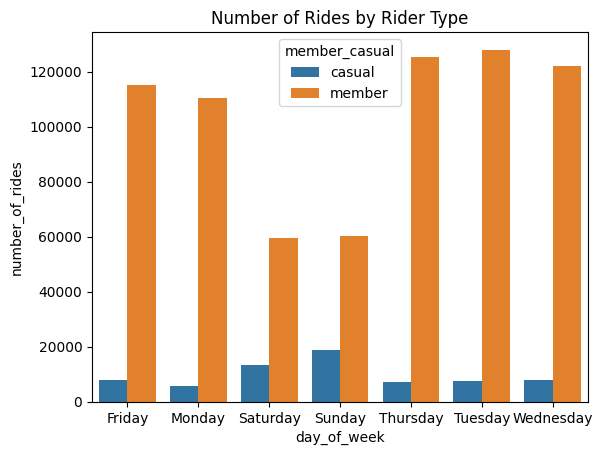

In [71]:
# number of rides by rider type
sns.barplot(x = "day_of_week", y = "number_of_rides", hue = "member_casual", data = counts)
plt.title("Number of Rides by Rider Type")
plt.show()

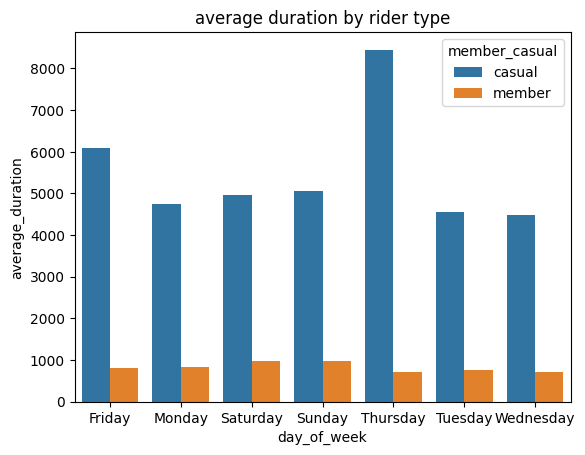

In [72]:
# average duration
sns.barplot(x = "day_of_week", y = "average_duration", hue = "member_casual", data = counts)
plt.title('average duration by rider type')
plt.show()

In [73]:

# Export summary file for further analysis
counts.to_csv('avg_ride_length.csv', index=False)